In [77]:
pip install python-louvain


Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community.quality import modularity


In [79]:
df = pd.read_csv ("/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/datasets/trade_combined.csv")
df

,Unnamed: 0,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,0,C,A,20150101,2015,52,2015,8,ALB,Albania,...,460379952.0,False,NaN,False,270211630.0,NaN,2.702116e+08,0,True,False
1,1,C,A,20150101,2015,52,2015,8,ALB,Albania,...,59410.0,False,NaN,False,131147.0,NaN,1.311470e+05,0,True,False
2,2,C,A,20150101,2015,52,2015,8,ALB,Albania,...,128665.0,False,NaN,False,325987.0,NaN,3.259870e+05,0,True,False
3,3,C,A,20150101,2015,52,2015,8,ALB,Albania,...,295955.0,False,NaN,False,193496.0,NaN,1.934960e+05,0,True,False
4,4,C,A,20150101,2015,52,2015,8,ALB,Albania,...,339614.0,False,NaN,False,425415.0,NaN,4.254150e+05,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154920,154920,C,A,20240101,2024,52,2024,894,ZMB,Zambia,...,79342.0,False,0.0,False,NaN,107145.504,1.071455e+05,0,False,True
154921,154921,C,A,20240101,2024,52,2024,894,ZMB,Zambia,...,165399.0,False,0.0,False,NaN,260709.002,2.607090e+05,0,False,True
154922,154922,C,A,20240101,2024,52,2024,894,ZMB,Zambia,...,36228.0,False,0.0,False,NaN,59690.841,5.969084e+04,0,False,True
154923,154923,C,A,20240101,2024,52,2024,894,ZMB,Zambia,...,26.0,False,0.0,False,NaN,286.566,2.865660e+02,0,False,True


In [80]:
df1 = df.drop (columns=['typeCode', "refMonth", "period",'freqCode', 'refPeriodId', 'reporterCode', 'flowCode', 'partnerCode',
    'partner2Code', 'partner2ISO', 'partner2Desc','classificationCode', 'classificationSearchCode',
    'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc','mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 
    'qtyUnitAbbr', 'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 
    'isNetWgtEstimated', 'grossWgt', 'isGrossWgtEstimated', 'cifvalue', 'fobvalue', "isOriginalClassification",'legacyEstimationFlag',"isReported","isAggregate"])
df1

,Unnamed: 0,refYear,reporterISO,reporterDesc,flowDesc,partnerISO,partnerDesc,cmdCode,cmdDesc,qty,netWgt,primaryValue
0,0,2015,ALB,Albania,Import,W00,World,2710,Petroleum oils and oils from bituminous minera...,460379952.0,460379952.0,2.702116e+08
1,1,2015,ALB,Albania,Import,AUT,Austria,2710,Petroleum oils and oils from bituminous minera...,59410.0,59410.0,1.311470e+05
2,2,2015,ALB,Albania,Import,BEL,Belgium,2710,Petroleum oils and oils from bituminous minera...,128665.0,128665.0,3.259870e+05
3,3,2015,ALB,Albania,Import,BIH,Bosnia Herzegovina,2710,Petroleum oils and oils from bituminous minera...,295955.0,295955.0,1.934960e+05
4,4,2015,ALB,Albania,Import,BGR,Bulgaria,2710,Petroleum oils and oils from bituminous minera...,339614.0,339614.0,4.254150e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
154920,154920,2024,ZMB,Zambia,Export,RWA,Rwanda,2710,Petroleum oils and oils from bituminous minera...,79342.0,79342.0,1.071455e+05
154921,154921,2024,ZMB,Zambia,Export,ZAF,South Africa,2710,Petroleum oils and oils from bituminous minera...,165399.0,165399.0,2.607090e+05
154922,154922,2024,ZMB,Zambia,Export,ZWE,Zimbabwe,2710,Petroleum oils and oils from bituminous minera...,36228.0,36228.0,5.969084e+04
154923,154923,2024,ZMB,Zambia,Export,UGA,Uganda,2710,Petroleum oils and oils from bituminous minera...,26.0,26.0,2.865660e+02


In [81]:
df1.count()

Unnamed: 0      154925
refYear         154925
reporterISO     154925
reporterDesc    154925
flowDesc        154925
partnerISO      154925
partnerDesc     154925
cmdCode         154925
cmdDesc         154925
qty             153953
netWgt          153546
primaryValue    154925
dtype: int64

In [82]:
df1 = df1.rename(columns={"refYear" : "Year",
                          "reporterISO" : "origin_country",
                          "reporterDesc" : "origin_country_name",
                          "flowDesc" : "flow",
                          "partnerISO" : "destination_country",
                          "partnerDesc" : "destination_country_name" ,
                          "cmdCode" : "HSCode",
                          "cmdDesc" : "commodity",
                          "qty" : "quantity",
                          "netWgt" : "netWeight",
                          "primaryValue" : "trade_value_usd"})
df1

,Unnamed: 0,Year,origin_country,origin_country_name,flow,destination_country,destination_country_name,HSCode,commodity,quantity,netWeight,trade_value_usd
0,0,2015,ALB,Albania,Import,W00,World,2710,Petroleum oils and oils from bituminous minera...,460379952.0,460379952.0,2.702116e+08
1,1,2015,ALB,Albania,Import,AUT,Austria,2710,Petroleum oils and oils from bituminous minera...,59410.0,59410.0,1.311470e+05
2,2,2015,ALB,Albania,Import,BEL,Belgium,2710,Petroleum oils and oils from bituminous minera...,128665.0,128665.0,3.259870e+05
3,3,2015,ALB,Albania,Import,BIH,Bosnia Herzegovina,2710,Petroleum oils and oils from bituminous minera...,295955.0,295955.0,1.934960e+05
4,4,2015,ALB,Albania,Import,BGR,Bulgaria,2710,Petroleum oils and oils from bituminous minera...,339614.0,339614.0,4.254150e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
154920,154920,2024,ZMB,Zambia,Export,RWA,Rwanda,2710,Petroleum oils and oils from bituminous minera...,79342.0,79342.0,1.071455e+05
154921,154921,2024,ZMB,Zambia,Export,ZAF,South Africa,2710,Petroleum oils and oils from bituminous minera...,165399.0,165399.0,2.607090e+05
154922,154922,2024,ZMB,Zambia,Export,ZWE,Zimbabwe,2710,Petroleum oils and oils from bituminous minera...,36228.0,36228.0,5.969084e+04
154923,154923,2024,ZMB,Zambia,Export,UGA,Uganda,2710,Petroleum oils and oils from bituminous minera...,26.0,26.0,2.865660e+02


In [83]:

df1.isnull().sum()/len(df1)*100


Unnamed: 0                  0.000000
Year                        0.000000
origin_country              0.000000
origin_country_name         0.000000
flow                        0.000000
destination_country         0.000000
destination_country_name    0.000000
HSCode                      0.000000
commodity                   0.000000
quantity                    0.627400
netWeight                   0.890108
trade_value_usd             0.000000
dtype: float64

In [84]:
df1 = df1.dropna() 


In [85]:
df1 = df1[df1["destination_country_name"] != "World"]

In [86]:
df1.to_csv('/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/datasets/trade_silver_cleaned.csv')


In [87]:
df1= pd.read_csv('/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/datasets/trade_silver_cleaned.csv')

# RQ1

# Structural Evolution of Global HS-2710 Trade Network (2015–2024)

In [88]:
df1["Year"] = pd.to_numeric(df1["Year"], errors="coerce")
df1["HSCode"] = pd.to_numeric(df1["HSCode"], errors="coerce")
df1["trade_value_usd"] = pd.to_numeric(df1["trade_value_usd"], errors="coerce")

df1 = df1.dropna(subset=[
    "Year", "HSCode", "origin_country_name", "destination_country_name", "flow", "trade_value_usd"
])


df1 = df1[(df1["HSCode"] == 2710) & (df1["Year"].between(2015, 2024))]
df1 = df1[df1["flow"].astype(str).str.strip().str.lower() == "export"]
df1 = df1[df1["trade_value_usd"] > 0].copy()

Aggregate to yearly exporter-importer edges

In [89]:
yearly_edge_data = (
    df1.groupby(["Year", "origin_country_name", "destination_country_name"], as_index=False)["trade_value_usd"]
      .sum()
      .rename(columns={
          "origin_country_name": "exporter",
          "destination_country_name": "importer",
          "trade_value_usd": "value_usd"
      })
)

BUILD YEARLY NETWORK GRAPHS (base for all analysis)

In [90]:
def build_year_graph(edges_for_year: pd.DataFrame) -> nx.DiGraph:
    """
    Create a directed weighted network:
      exporter -> importer, weight = total trade value (USD)
    """
    G = nx.DiGraph()
    for _, r in edges_for_year.iterrows():
        u = r["exporter"]
        v = r["importer"]
        w = float(r["value_usd"])
        if u == v:
            continue
        if G.has_edge(u, v):
            G[u][v]["weight"] += w
        else:
            G.add_edge(u, v, weight=w)
    return G

years = list(range(2015, 2025))
graphs_by_year = {y: build_year_graph(yearly_edge_data[yearly_edge_data["Year"] == y]) for y in years}


NETWORK STRUCTURE METRICS OVER TIME

In [91]:
metrics_rows = []
community_rows = []

for y in years:
    G = graphs_by_year[y]
 
    # C1) Density (directed)
    #     Answers: "network density falling during COVID-19 but recovering by 2023"
    dens = nx.density(G) if G.number_of_nodes() > 1 else np.nan

    # C2) Modularity and communities (undirected)
    #     Answers: "increased modularity and regionalization", "fragmentation"
    Gu = G.to_undirected()

    # Remove isolates so they don’t create fake single-node clusters
    isolate_nodes = list(nx.isolates(Gu))
    Gu.remove_nodes_from(isolate_nodes)

    if Gu.number_of_nodes() >= 3 and Gu.number_of_edges() > 0:
        communities = louvain_communities(Gu, weight="weight", seed=42)
        mod = modularity(Gu, communities, weight="weight")

        sizes = sorted([len(c) for c in communities], reverse=True)
        cluster_count = len(sizes)
        largest_share = sizes[0] / Gu.number_of_nodes()
    else:
        mod = np.nan
        cluster_count = np.nan
        largest_share = np.nan

    metrics_rows.append({
        "Year": y,
        "density": dens,
        "modularity": mod
    })

    community_rows.append({
        "Year": y,
        "cluster_count": cluster_count,
        "largest_cluster_share_pct": (largest_share * 100) if pd.notna(largest_share) else np.nan
    })

network_metrics = pd.DataFrame(metrics_rows)
community_summary = pd.DataFrame(community_rows)
community_summary["largest_cluster_share_pct"] = community_summary["largest_cluster_share_pct"].round(0)
 
print(community_summary)
network_metrics

   Year  cluster_count  largest_cluster_share_pct
0  2015              8                       28.0
1  2016              7                       24.0
2  2017              7                       22.0
3  2018              6                       24.0
4  2019              7                       28.0
5  2020              6                       36.0
6  2021              5                       38.0
7  2022              6                       28.0
8  2023              7                       28.0
9  2024              6                       27.0


,Year,density,modularity
0,2015,0.133573,0.532417
1,2016,0.127619,0.514418
2,2017,0.137883,0.513358
3,2018,0.137355,0.551288
4,2019,0.142589,0.526966
5,2020,0.138316,0.543322
6,2021,0.135860,0.546017
7,2022,0.133178,0.546541
8,2023,0.135722,0.552002
9,2024,0.122407,0.543631


DENSITY + MODULARITY OVER TIME

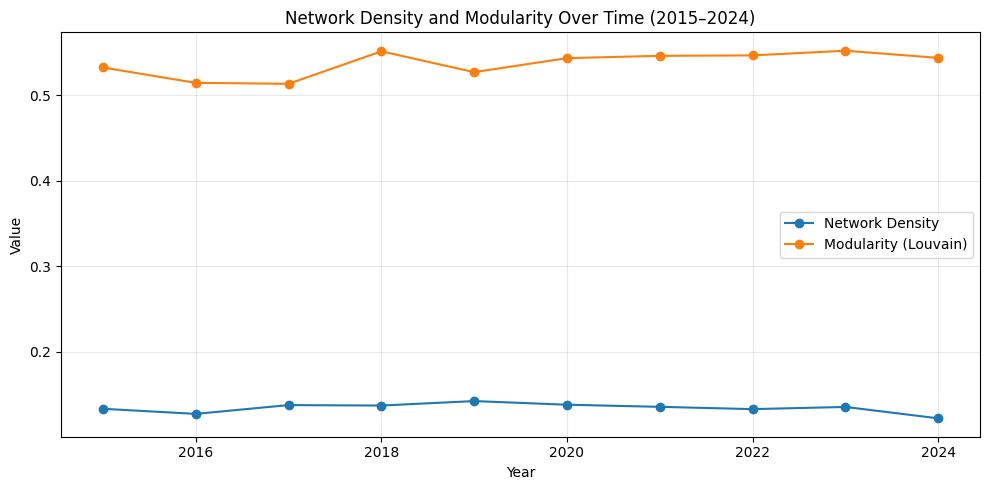

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(network_metrics["Year"], network_metrics["density"], marker="o", label="Network Density")
plt.plot(network_metrics["Year"], network_metrics["modularity"], marker="o", label="Modularity (Louvain)")
plt.title("Network Density and Modularity Over Time (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

CENTRALITY COMPARISON (2015 vs 2024)

In [93]:
def top_central_countries(G: nx.DiGraph, top_n=10) -> pd.DataFrame:
    """
    Correct normalized degree centrality (0..1) on undirected graph.
    """
    Gu = G.to_undirected()
    if Gu.number_of_nodes() <= 1:
        return pd.DataFrame(columns=["rank", "country", "degree_centrality"])

    deg_cent = nx.degree_centrality(Gu)  # correct: always between 0 and 1
    out = (pd.DataFrame({"country": list(deg_cent.keys()), "degree_centrality": list(deg_cent.values())})
             .sort_values("degree_centrality", ascending=False)
             .head(top_n)
             .reset_index(drop=True))
    out.index = out.index + 1
    out.insert(0, "rank", out.index)
    return out

top10_2015 = top_central_countries(graphs_by_year[2015], top_n=10).rename(columns={"degree_centrality": "degree_centrality_2015"})
top10_2024 = top_central_countries(graphs_by_year[2024], top_n=10).rename(columns={"degree_centrality": "degree_centrality_2024"})

centrality_comparison = pd.merge(
    top10_2015[["rank", "country", "degree_centrality_2015"]],
    top10_2024[["rank", "country", "degree_centrality_2024"]],
    on="rank",
    how="outer"
)

print("\nTop 10 countries by degree centrality: 2015 vs 2024")
print(centrality_comparison.to_string(index=False))


Top 10 countries by degree centrality: 2015 vs 2024
 rank            country_x  degree_centrality_2015            country_y  degree_centrality_2024
    1          Netherlands                0.809322                China                0.800000
    2                  USA                0.775424              T¸rkiye                0.775000
    3              Belgium                0.758475              Germany                0.770833
    4               France                0.745763               France                0.754167
    5              T¸rkiye                0.716102              Belgium                0.750000
    6              Germany                0.677966          Netherlands                0.737500
    7                China                0.669492                  USA                0.733333
    8       United Kingdom                0.669492 United Arab Emirates                0.733333
    9 United Arab Emirates                0.661017            Singapore            

In [94]:
def get_top10_subgraph(G: nx.DiGraph, top_n=10):
    """
    Returns a subgraph containing only top-N nodes
    by normalized degree centrality (correct metric).
    """
    Gu = G.to_undirected()
    dc = nx.degree_centrality(Gu)

    # Select top-N nodes
    top_nodes = [n for n, _ in sorted(dc.items(), key=lambda x: x[1], reverse=True)[:top_n]]

    # Subgraph with only those nodes (edges between them)
    return G.subgraph(top_nodes).copy()

In [95]:
G_2015_top = get_top10_subgraph(graphs_by_year[2015], top_n=10)
G_2024_top = get_top10_subgraph(graphs_by_year[2024], top_n=10)

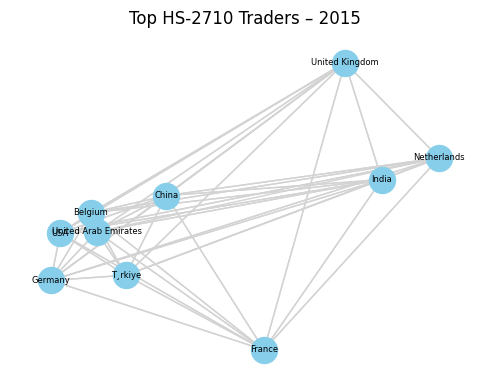

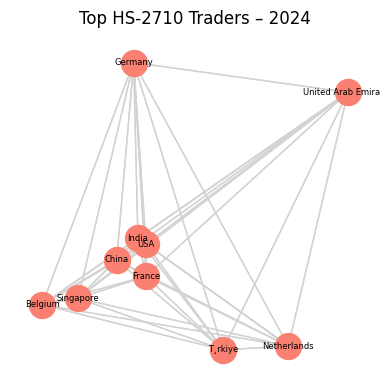

In [96]:
import matplotlib.pyplot as plt
import networkx as nx

# Layouts (fixed seed for reproducibility)
pos_2015 = nx.spring_layout(G_2015_top, weight="weight", seed=42)
pos_2024 = nx.spring_layout(G_2024_top, weight="weight", seed=42)

# ----- Figure for 2015 -----
plt.figure(figsize=(5, 4))
nx.draw_networkx(
    G_2015_top,
    pos_2015,
    node_size=350,
    node_color="skyblue",
    edge_color="lightgray",
    arrows=False,
    font_size=6
)
plt.title("Top HS-2710 Traders – 2015")
plt.axis("off")
plt.tight_layout()
plt.show()

# ----- Figure for 2024 -----
plt.figure(figsize=(4, 4))
nx.draw_networkx(
    G_2024_top,
    pos_2024,
    node_size=350,
    node_color="salmon",
    edge_color="lightgray",
    arrows=False,
    font_size=6
)
plt.title("Top HS-2710 Traders – 2024")
plt.axis("off")
plt.tight_layout()
plt.show()

# RQ2

Russia’s export redirection

In [97]:


df1["Year"] = pd.to_numeric(df1["Year"], errors="coerce")
df1["HSCode"] = pd.to_numeric(df1["HSCode"], errors="coerce")
df1["trade_value_usd"] = pd.to_numeric(df1["trade_value_usd"], errors="coerce")

df1 = df1.dropna(subset=[
    "Year", "HSCode", "origin_country", "destination_country", "trade_value_usd"
])

df1 = df1[
    (df1["HSCode"] == 2710) &
    (df1["origin_country"] == "RUS") &
    (df1["Year"].between(2015, 2024)) &
    (df1["trade_value_usd"] > 0)
].copy()

In [98]:
europe = ["DEU","FRA","ITA","ESP","NLD","BEL","POL","GRC","GBR","FIN","SWE","AUT"]
asia   = ["CHN","IND","SGP","JPN","KOR","TUR","ARE","SAU","IDN","MYS"]
africa = ["EGY","MAR","ZAF","NGA","TUN","DZA","KEN"]

def region_map(iso):
    if iso in europe:
        return "Europe"
    elif iso in asia:
        return "Asia"
    elif iso in africa:
        return "Africa"
    else:
        return "Other"

df1["region"] = df1["destination_country"].apply(region_map)
df1["region"]

78984      Other
78985      Other
78986     Africa
78987      Other
78988      Other
           ...  
124815     Other
124816     Other
124817     Other
124818     Other
124819     Other
Name: region, Length: 1065, dtype: object

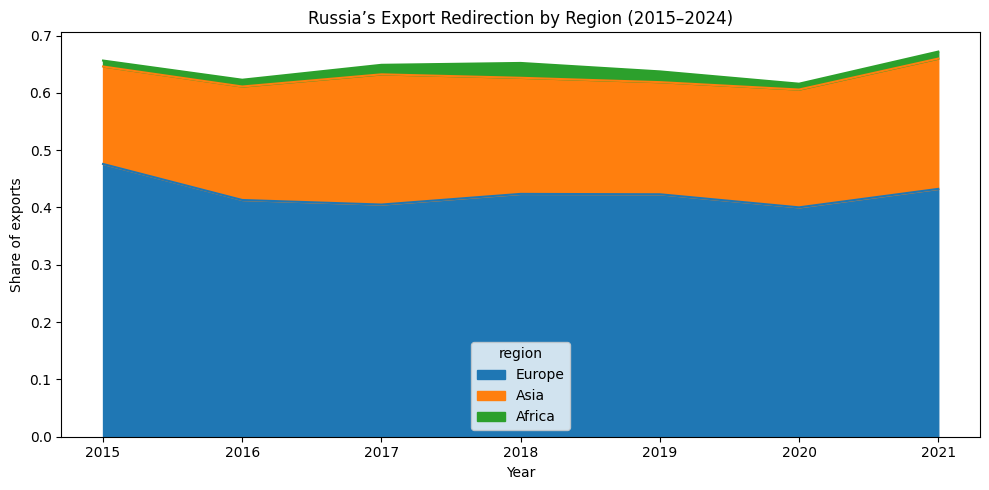

In [99]:
region_year = (
    df1.groupby(["Year","region"])["trade_value_usd"]
      .sum()
      .reset_index()
)

total_year = region_year.groupby("Year")["trade_value_usd"].sum().reset_index()
region_year = region_year.merge(total_year, on="Year", suffixes=("","_total"))
region_year["share"] = region_year["trade_value_usd"] / region_year["trade_value_usd_total"]

pivot = region_year.pivot(index="Year", columns="region", values="share").fillna(0)

pivot[["Europe","Asia","Africa"]].plot(
    kind="area", stacked=True, figsize=(10,5)
)

plt.title("Russia’s Export Redirection by Region (2015–2024)")
plt.ylabel("Share of exports")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# RQ3

# COVID-19 Elasticity & Shock Propagation

API GDP dataset

In [100]:
import wbdata
import pandas as pd

# World Bank GDP indicator
indicator = {"NY.GDP.MKTP.CD": "gdp_usd"}

# Download ALL available years
gdp = wbdata.get_dataframe(indicator)

# Clean format
gdp = gdp.reset_index()
gdp.columns = ["country", "Year", "gdp_usd"]

# Convert Year to int
gdp["Year"] = gdp["Year"].astype(int)

# Filter only years you need
gdp = gdp[(gdp["Year"] >= 2015) & (gdp["Year"] <= 2024)]

gdp.head()

gdp["Year"].unique()
gdp.isna().sum()
gdp.describe()

gdp.to_csv('/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/GDPdatasets.csv')

 GDP Data Preparation

In [101]:
gdp = pd.read_csv("/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/GDPdatasets.csv")

gdp["Year"] = gdp["Year"].astype(int)
gdp["gdp_usd"] = pd.to_numeric(gdp["gdp_usd"], errors="coerce")

# Global GDP per year
gdp_world = (
    gdp
    .groupby("Year", as_index=False)["gdp_usd"]
    .sum()
)

Elasticity of refined-oil trade to GDP 

In [102]:
import numpy as np
import statsmodels.api as sm
df1= pd.read_csv("/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/datasets/trade_silver_cleaned.csv")

trade_global = (
    df1[df1["HSCode"] == 2710]
    .groupby("Year", as_index=False)["trade_value_usd"]
    .sum()
    .rename(columns={"trade_value_usd": "trade_usd"})
)

def build_elasticity_data(trade_df, gdp_df, start_year=None, end_year=None):
    tmp = trade_df.merge(gdp_df, on="Year", how="inner")
    if start_year is not None:
        tmp = tmp[tmp["Year"] >= start_year]
    if end_year is not None:
        tmp = tmp[tmp["Year"] <= end_year]
    tmp = tmp.copy()
    tmp["ln_trade"] = np.log(tmp["trade_usd"])
    tmp["ln_gdp"] = np.log(tmp["gdp_usd"])
    return tmp

def elasticity_period(trade_df, gdp_df, start_year, end_year):
    data = build_elasticity_data(trade_df, gdp_df, start_year, end_year)
    X = sm.add_constant(data[["ln_gdp"]])
    y = data["ln_trade"]
    model = sm.OLS(y, X).fit()
    return float(model.params["ln_gdp"])

elasticity_2015_2019 = elasticity_period(trade_global, gdp_world, 2015, 2019)
elasticity_2020 = elasticity_period(trade_global, gdp_world, 2020, 2020)
elasticity_2021_2024 = elasticity_period(trade_global, gdp_world, 2021, 2024)

elasticity_table = pd.DataFrame({
    "Period": ["2015–2019", "2020", "2021–2024"],
    "Elasticity": [elasticity_2015_2019, elasticity_2020, elasticity_2021_2024]
})
trade_global
print(elasticity_table)


      Period  Elasticity
0  2015–2019    2.391880
1       2020    0.804965
2  2021–2024    0.292668


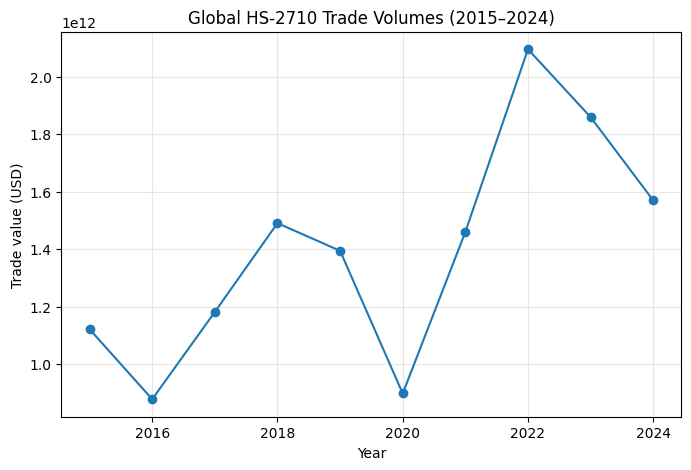

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(trade_global["Year"], trade_global["trade_usd"], marker="o")
plt.title("Global HS‑2710 Trade Volumes (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Trade value (USD)")
plt.grid(alpha=0.3)
plt.show()


Fuel‑specific shocks 

In [104]:
df_trade_fuel = pd.read_csv('/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/datasets/to2023subclean.csv')


In [105]:
fuel_map = {
    271012: "Gasoline",
    271019: "Jet fuel / Kerosene",
    271020: "Diesel / Gasoil",
}


In [106]:

df_fuel = df_trade_fuel[(df_trade_fuel["flow"] == "Import") & (df_trade_fuel["HSCode"].isin([271012, 271019, 271020]))].copy()
df_fuel["Year"] = df_fuel["Year"].astype(int)
df_fuel["trade_value_usd"] = pd.to_numeric(df_fuel["trade_value_usd"], errors="coerce").fillna(0)
df_fuel = df_fuel[df_fuel["destination_country_name"] != "World"]
fuel_map = {
    271012: "Gasoline",
    271019: "Jet fuel / Kerosene",
    271020: "Diesel / Gasoil",
}

df_fuel["fuel_type"] = df_fuel["HSCode"].map(fuel_map)

print(df_fuel[["Year", "HSCode", "fuel_type", "trade_value_usd"]].head())
print("Fuel types:", df_fuel["fuel_type"].unique())


   Year  HSCode fuel_type  trade_value_usd
1  2015  271012  Gasoline         171992.0
2  2015  271012  Gasoline        2996498.0
3  2015  271012  Gasoline          17344.0
4  2015  271012  Gasoline        6702342.0
5  2015  271012  Gasoline          28109.0
Fuel types: ['Gasoline' 'Jet fuel / Kerosene' 'Diesel / Gasoil']


Aggregate imports by year and fuel type

In [107]:
fuel_year = (
    df_fuel
    .groupby(["Year", "fuel_type"], as_index=False)["trade_value_usd"]
    .sum()
    .rename(columns={"trade_value_usd": "import_value_usd"})
)

print(fuel_year.head())


   Year            fuel_type  import_value_usd
0  2015      Diesel / Gasoil      9.606640e+09
1  2015             Gasoline      1.750281e+11
2  2015  Jet fuel / Kerosene      3.333551e+11
3  2016      Diesel / Gasoil      7.636541e+09
4  2016             Gasoline      1.555612e+11


2019→2020 shock per fuel 

In [108]:
base_2019 = fuel_year[fuel_year["Year"] == 2019][["fuel_type", "import_value_usd"]]
base_2019 = base_2019.rename(columns={"import_value_usd": "import_2019"})

imp_2020 = fuel_year[fuel_year["Year"] == 2020][["fuel_type", "import_value_usd"]]
imp_2020 = imp_2020.rename(columns={"import_value_usd": "import_2020"})

fuel_shock = base_2019.merge(imp_2020, on="fuel_type", how="inner")
fuel_shock["pct_change_2020"] = (
    (fuel_shock["import_2020"] - fuel_shock["import_2019"]) / fuel_shock["import_2019"] * 100
).round(1)

print("2019→2020 shock by fuel type:")
print(fuel_shock)


2019→2020 shock by fuel type:
             fuel_type   import_2019   import_2020  pct_change_2020
0      Diesel / Gasoil  1.295391e+10  7.933386e+09            -38.8
1             Gasoline  2.449717e+11  1.641308e+11            -33.0
2  Jet fuel / Kerosene  3.998384e+11  2.533638e+11            -36.6


Fuel‑type import trends

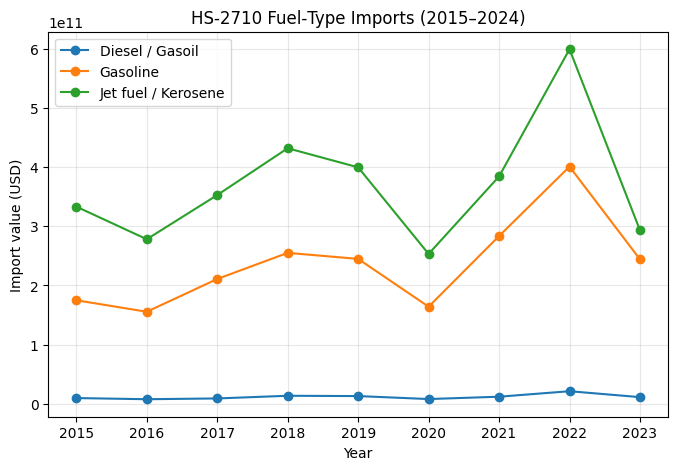

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for fuel in fuel_year["fuel_type"].unique():
    data_f = fuel_year[fuel_year["fuel_type"] == fuel]
    plt.plot(data_f["Year"], data_f["import_value_usd"], marker="o", label=fuel)

plt.title("HS‑2710 Fuel‑Type Imports (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Import value (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


importer–partner–year shares for HS‑2710 imports

In [110]:
import pandas as pd

imports = df1[
    (df1["HSCode"] == 2710) &
    (df1["flow"] == "Import")
].copy()

imports["Year"] = imports["Year"].astype(int)
imports["trade_value_usd"] = pd.to_numeric(imports["trade_value_usd"], errors="coerce").fillna(0)

# Reporter = importer, partner = exporter
by_pair = (
    imports
    .groupby(["Year", "origin_country", "destination_country"], as_index=False)["trade_value_usd"]
    .sum()
    .rename(columns={
        "destination_country": "importer",
        "origin_country": "partner"
    })
)

# Share of each partner in importer’s total HS‑2710 imports
total_imports = by_pair.groupby(["Year", "importer"])["trade_value_usd"].transform("sum")
by_pair["share"] = by_pair["trade_value_usd"] / total_imports


top‑3 share per importer‑year

In [111]:
# by_pair already defined earlier

def top3_share(group):
    return group["share"].nlargest(3).sum()

top3_importer_year = (
    by_pair
    .groupby(["Year", "importer"])
    .apply(top3_share)
    .reset_index(name="top3_share")
)

print(top3_importer_year.head())


   Year importer  top3_share
0  2015      ABW    0.767542
1  2015      AFG    0.997247
2  2015      AGO    0.906462
3  2015      ALB    0.840526
4  2015      AND    0.991884


/var/folders/6r/90njclqj6y94ddp1g2v210_c0000gn/T/ipykernel_12949/1284735054.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(top3_share)


 Average dependency by year

In [112]:
dependency_year = (
    top3_importer_year
    .groupby("Year", as_index=False)["top3_share"]
    .mean()
)

dependency_year["top3_share_pct"] = (dependency_year["top3_share"] * 100).round(1)

print("Average top‑3 import partner share by year:")
print(dependency_year)


Average top‑3 import partner share by year:
   Year  top3_share  top3_share_pct
0  2015    0.840538            84.1
1  2016    0.835065            83.5
2  2017    0.839003            83.9
3  2018    0.835679            83.6
4  2019    0.835221            83.5
5  2020    0.828915            82.9
6  2021    0.838180            83.8
7  2022    0.834415            83.4
8  2023    0.832422            83.2
9  2024    0.844444            84.4


# RQ4

### regions + Clean + filter exports

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

country_to_region = {
    # Asia
    "India": "Asia", "China": "Asia", "Singapore": "Asia", "South Korea": "Asia", "Japan": "Asia",
    # Middle East
    "United Arab Emirates": "Middle East", "Saudi Arabia": "Middle East", "Kuwait": "Middle East",
    "Qatar": "Middle East", "Oman": "Middle East",
    # Europe
    "Netherlands": "Europe", "Germany": "Europe", "France": "Europe", "Belgium": "Europe",
    "United Kingdom": "Europe", "Spain": "Europe", "Italy": "Europe",
}


df1= pd.read_csv("/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/datasets/trade_silver_cleaned.csv")

trade = df1.copy()

trade["Year"] = pd.to_numeric(trade["Year"], errors="coerce")
trade["HSCode"] = pd.to_numeric(trade["HSCode"], errors="coerce")
trade["trade_value_usd"] = pd.to_numeric(trade["trade_value_usd"], errors="coerce")

trade = trade[
    (trade["HSCode"] == 2710) &
    (trade["flow"].str.lower() == "export") &
    (trade["Year"].between(2015, 2024)) &
    (trade["trade_value_usd"].notna()) &
    (trade["origin_country_name"].notna())
].copy()

# remove aggregate rows safely (do NOT let W00/World distort totals)
trade = trade[
    trade["origin_country_name"].ne("World") &
    trade["destination_country_name"].ne("World") &
    trade["origin_country"].ne("W00") &
    trade["destination_country"].ne("W00")
].copy()

trade["Year"] = trade["Year"].astype(int)



### FIGURE — Export share by region (only mapped countries)

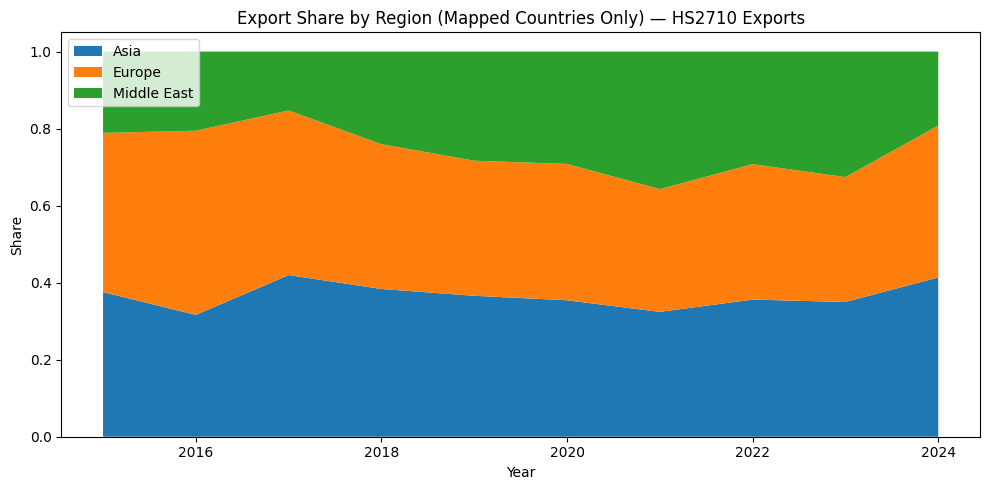

In [114]:

trade["region"] = trade["origin_country_name"].map(country_to_region)
mapped = trade.dropna(subset=["region"]).copy()

region_year = (
    mapped.groupby(["Year", "region"], as_index=False)["trade_value_usd"].sum()
)

region_total_year = (
    region_year.groupby("Year", as_index=False)["trade_value_usd"].sum()
    .rename(columns={"trade_value_usd": "mapped_total_usd"})
)

region_year = region_year.merge(region_total_year, on="Year", how="left")
region_year["share"] = region_year["trade_value_usd"] / region_year["mapped_total_usd"]

share_wide = region_year.pivot(index="Year", columns="region", values="share").fillna(0)

plt.figure(figsize=(10,5))
plt.stackplot(share_wide.index, share_wide.T, labels=share_wide.columns)
plt.title("Export Share by Region (Mapped Countries Only) — HS2710 Exports")
plt.xlabel("Year"); plt.ylabel("Share")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


### HHI — GLOBAL exporters annually 

In [115]:

country_year = (
    trade.groupby(["Year", "origin_country_name"], as_index=False)["trade_value_usd"].sum()
)

total_year = (
    country_year.groupby("Year", as_index=False)["trade_value_usd"].sum()
    .rename(columns={"trade_value_usd": "total_exports_usd"})
)

country_year = country_year.merge(total_year, on="Year", how="left")
country_year["share"] = country_year["trade_value_usd"] / country_year["total_exports_usd"]

hhi = (
    country_year.groupby("Year")["share"]
    .apply(lambda s: float(np.sum(np.square(s.values))))
    .reset_index(name="HHI")
)
hhi["HHI"] = hhi["HHI"].round(3)
print("\nHHI (global exporters, annual):")
hhi


HHI (global exporters, annual):


,Year,HHI
0,2015,0.052
1,2016,0.061
2,2017,0.056
3,2018,0.052
4,2019,0.053
5,2020,0.058
6,2021,0.057
7,2022,0.054
8,2023,0.055
9,2024,0.060


### India/UAE/China 

In [116]:

hub_countries = ["India", "United Arab Emirates", "China"]

hub_year = (
    trade[trade["origin_country_name"].isin(hub_countries)]
    .groupby(["origin_country_name", "Year"], as_index=False)["trade_value_usd"].sum()
)

# A) Single-year: 2015 vs 2024 (simple)
hub_2015_2024 = (
    hub_year[hub_year["Year"].isin([2015, 2024])]
    .pivot(index="origin_country_name", columns="Year", values="trade_value_usd")
    .reset_index()
    .rename(columns={"origin_country_name": "Country", 2015: "exports_2015", 2024: "exports_2024"})
)
print("\nHub exporters: 2015 vs 2024")
print(hub_2015_2024)


Hub exporters: 2015 vs 2024
Year               Country  exports_2015  exports_2024
0                    China  1.908742e+10  4.179948e+10
1                    India  3.045498e+10  6.919252e+10
2     United Arab Emirates  2.321798e+10  4.200502e+10


# RQ5 Global Forecast + GDP-driven Scenarios + Rolling Evaluation + Regional Forecasts

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# ----------------------------
# USER SETTINGS
# ----------------------------
FLOW = "Export"
START_YEAR = 2015
END_YEAR = 2024
FORECAST_YEARS = [2025, 2026, 2027, 2028]
# 1) CLEAN TRADE DATA 
df1= pd.read_csv("/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/datasets/trade_silver_cleaned.csv")
df = df1.copy()

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["trade_value_usd"] = pd.to_numeric(df["trade_value_usd"], errors="coerce")
df = df.dropna(subset=["Year", "trade_value_usd"])
df["Year"] = df["Year"].astype(int)

# Use one flow to avoid double counting
if "flow" in df.columns:
    df = df[df["flow"].astype(str).str.lower() == FLOW.lower()]

# Keep only training years
df = df[(df["Year"] >= START_YEAR) & (df["Year"] <= END_YEAR)].copy()

# Build global yearly trade series
global_ts = (
    df.groupby("Year", as_index=False)["trade_value_usd"]
      .sum()
      .sort_values("Year")
)

print("Global Trade TS:")
print(global_ts)




Global Trade TS:
   Year  trade_value_usd
0  2015     5.929266e+11
1  2016     4.487286e+11
2  2017     6.088517e+11
3  2018     7.847521e+11
4  2019     7.355960e+11
5  2020     4.737485e+11
6  2021     7.675099e+11
7  2022     1.069260e+12
8  2023     9.448251e+11
9  2024     7.814235e+11


### LOAD & PREPARE GDP (GLOBAL GDP)

In [118]:

gdp = pd.read_csv("/Users/nandipimahanth/Library/CloudStorage/OneDrive-UniversityofAppliedSciencesEuropeGmbH(ehem.BiTSbtk)-Berlin,Hamburg,Iserlohn/THESIS FILE/GDPdatasets.csv")

# remove any unnamed columns
gdp = gdp.drop(columns=[c for c in gdp.columns if "Unnamed" in c], errors="ignore")

gdp["Year"] = pd.to_numeric(gdp["Year"], errors="coerce")
gdp["gdp_usd"] = pd.to_numeric(gdp["gdp_usd"], errors="coerce")
gdp = gdp.dropna(subset=["Year", "gdp_usd"])
gdp["Year"] = gdp["Year"].astype(int)

# Keep only training years
gdp = gdp[(gdp["Year"] >= START_YEAR) & (gdp["Year"] <= END_YEAR)].copy()

# GLOBAL GDP per year
global_gdp = (
    gdp.groupby("Year", as_index=False)["gdp_usd"]
       .sum()
       .sort_values("Year")
)

print("\nGlobal GDP TS:")
print(global_gdp)


Global GDP TS:
   Year       gdp_usd
0  2015  6.190289e+14
1  2016  6.274143e+14
2  2017  6.721229e+14
3  2018  7.158518e+14
4  2019  7.292735e+14
5  2020  7.070067e+14
6  2021  8.124869e+14
7  2022  8.469695e+14
8  2023  8.827283e+14
9  2024  9.168694e+14


###  MERGE TRADE + GDP 

In [119]:

ts = pd.merge(global_ts, global_gdp, on="Year", how="inner").sort_values("Year")

# y = trade, X = GDP
y = pd.Series(ts["trade_value_usd"].values, index=ts["Year"].values)
X = ts[["gdp_usd"]].values  # must be 2D

print("\nMerged TS (trade + GDP):")
print(ts)



Merged TS (trade + GDP):
   Year  trade_value_usd       gdp_usd
0  2015     5.929266e+11  6.190289e+14
1  2016     4.487286e+11  6.274143e+14
2  2017     6.088517e+11  6.721229e+14
3  2018     7.847521e+11  7.158518e+14
4  2019     7.355960e+11  7.292735e+14
5  2020     4.737485e+11  7.070067e+14
6  2021     7.675099e+11  8.124869e+14
7  2022     1.069260e+12  8.469695e+14
8  2023     9.448251e+11  8.827283e+14
9  2024     7.814235e+11  9.168694e+14


###  FIT TRUE SARIMAX

In [120]:
model = SARIMAX(
    y,
    exog=X,
    order=(1, 1, 1),
    seasonal_order=(0, 0, 0, 0),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


### GDP SCENARIOS FOR 2025–2028

In [121]:

last_gdp_2024 = float(global_gdp.loc[global_gdp["Year"] == END_YEAR, "gdp_usd"].iloc[0])

# Baseline: +2% per year
gdp_baseline = np.array([last_gdp_2024 * (1.02 ** i) for i in range(1, 5)]).reshape(-1, 1)

# Fragmentation: baseline GDP * 0.95 (lower activity)
gdp_fragment = (gdp_baseline * 0.95)

# Energy transition: baseline GDP * 0.85 (stronger structural shift)
gdp_transition = (gdp_baseline * 0.85)

gdp_scenarios = {
    "Baseline Recovery": gdp_baseline,
    "Geopolitical Fragmentation": gdp_fragment,
    "Accelerated Energy Transition": gdp_transition
}

### FORECAST UNDER EACH SCENARIO

In [122]:

scenario_forecasts = []

for scen_name, X_future in gdp_scenarios.items():
    fc = model.get_forecast(steps=len(FORECAST_YEARS), exog=X_future)
    ci = fc.conf_int()

    df_fc = pd.DataFrame({
        "Year": FORECAST_YEARS,
        "Scenario": scen_name,
        "forecast": fc.predicted_mean.values,
        "lower_ci": ci.iloc[:, 0].values,
        "upper_ci": ci.iloc[:, 1].values
    })

    scenario_forecasts.append(df_fc)

scenario_df = pd.concat(scenario_forecasts, ignore_index=True)
print("\nScenario Forecasts:")
scenario_df


Scenario Forecasts:


/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  re

,Year,Scenario,forecast,lower_ci,upper_ci
0,2025,Baseline Recovery,7.945740e+11,4.161891e+11,1.172959e+12
1,2026,Baseline Recovery,8.403772e+11,1.019420e+11,1.578812e+12
2,2027,Baseline Recovery,8.850502e+11,-7.784554e+10,1.847946e+12
3,2028,Baseline Recovery,9.307459e+11,-2.139429e+11,2.075435e+12
4,2025,Geopolitical Fragmentation,6.847889e+11,3.064040e+11,1.063174e+12
5,2026,Geopolitical Fragmentation,7.283964e+11,-1.003881e+10,1.466832e+12
6,2027,Geopolitical Fragmentation,7.708297e+11,-1.920660e+11,1.733725e+12
7,2028,Geopolitical Fragmentation,8.142410e+11,-3.304477e+11,1.958930e+12
8,2025,Accelerated Energy Transition,4.652186e+11,8.683381e+10,8.436035e+11
9,2026,Accelerated Energy Transition,5.044347e+11,-2.340004e+11,1.242870e+12


### PLOT GLOBAL ACTUAL + SCENARIO FORECASTS

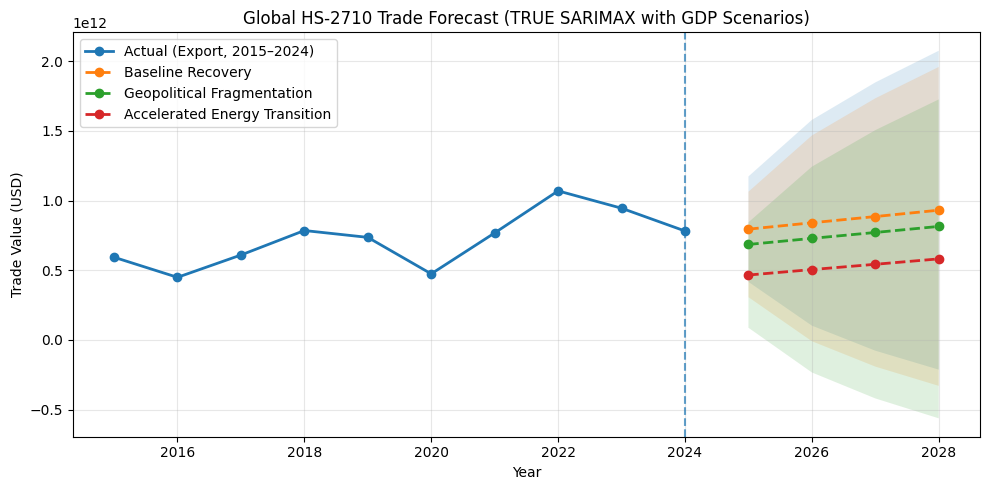

In [123]:

plt.figure(figsize=(10, 5))

# Actual
plt.plot(ts["Year"], ts["trade_value_usd"], marker="o", linewidth=2,
         label=f"Actual ({FLOW}, {START_YEAR}–{END_YEAR})")

# Plot each scenario: mean + CI band
for scen_name in scenario_df["Scenario"].unique():
    sub = scenario_df[scenario_df["Scenario"] == scen_name].sort_values("Year")

    # mean line
    plt.plot(sub["Year"], sub["forecast"], marker="o", linestyle="--", linewidth=2, label=scen_name)

    # CI band (this is what you were missing)
    plt.fill_between(
        sub["Year"],
        sub["lower_ci"],
        sub["upper_ci"],
        alpha=0.15
    )

plt.axvline(END_YEAR, linestyle="--", alpha=0.7)
plt.title("Global HS-2710 Trade Forecast (TRUE SARIMAX with GDP Scenarios)")
plt.xlabel("Year")
plt.ylabel("Trade Value (USD)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### ROLLING-ORIGIN EVALUATION (TRUE SARIMAX with GDP)

In [124]:

def rolling_origin_eval_sarimax(y_series, X_matrix, years, start_min_obs=6):
    years = np.asarray(years, dtype=int)
    y_vals = np.asarray(y_series, dtype=float)
    X_vals = np.asarray(X_matrix, dtype=float)

    preds, actuals = [], []

    for i in range(start_min_obs, len(years)):
        y_train = pd.Series(y_vals[:i], index=years[:i])
        X_train = X_vals[:i]
        X_test  = X_vals[i:i+1]  # shape (1, k)

        fit = SARIMAX(
            y_train,
            exog=X_train,
            order=(1, 1, 1),
            seasonal_order=(0, 0, 0, 0),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        pred = float(fit.get_forecast(steps=1, exog=X_test).predicted_mean.iloc[0])
        actual = float(y_vals[i])

        preds.append(pred)
        actuals.append(actual)

    preds = np.array(preds)
    actuals = np.array(actuals)

    mae = np.mean(np.abs(actuals - preds))
    rmse = np.sqrt(np.mean((actuals - preds) ** 2))

    eps = 1e-9
    mape = np.mean(np.abs(actuals - preds) / np.maximum(np.abs(actuals), eps)) * 100
    return mae, rmse, mape

mae, rmse, mape = rolling_origin_eval_sarimax(
    y_series=ts["trade_value_usd"].values,
    X_matrix=ts[["gdp_usd"]].values,
    years=ts["Year"].values,
    start_min_obs=6
)

metrics_table = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "MAPE"],
    "Value": [round(mae/1e9, 1), round(rmse/1e9, 1), f"{round(mape, 1)}%"]
})

print("\nTable 5.2 — Forecast Accuracy (Rolling-origin, TRUE SARIMAX):")
metrics_table


Table 5.2 — Forecast Accuracy (Rolling-origin, TRUE SARIMAX):


/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be giv

,Metric,Value
0,MAE,234.9
1,RMSE,282.3
2,MAPE,26.4%


/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next versi


Regional Forecasts (2028):
        region  forecast_2028_usd
2         Asia       2.538285e+11
3       Europe       1.798550e+11
1     Americas       1.460930e+11
4  Middle East       1.180999e+11
0       Africa       6.698395e+09


/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/ml311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


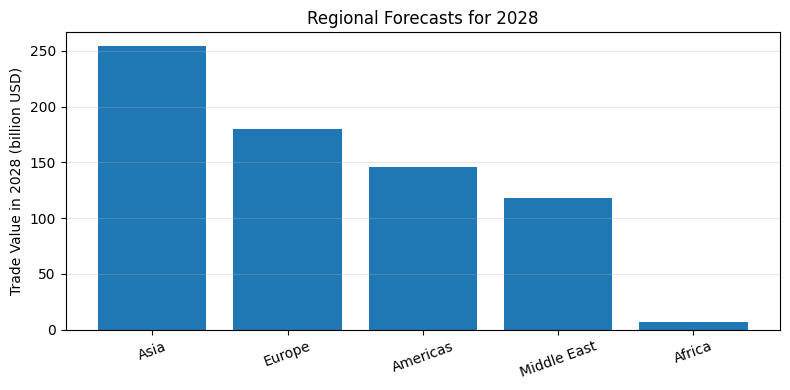

In [125]:
# ----------------------------
# 9) REGIONAL FORECASTS (simple ARIMA per region)
# ----------------------------
region_map = {
    "India":"Asia","China":"Asia","Singapore":"Asia","Japan":"Asia","Rep. of Korea":"Asia","Korea, Rep.":"Asia",
    "Netherlands":"Europe","Germany":"Europe","France":"Europe","Belgium":"Europe","United Kingdom":"Europe","Italy":"Europe","Spain":"Europe",
    "United Arab Emirates":"Middle East","Saudi Arabia":"Middle East","Kuwait":"Middle East","Qatar":"Middle East","Oman":"Middle East",
    "South Africa":"Africa","Nigeria":"Africa","Egypt":"Africa","Algeria":"Africa","Morocco":"Africa",
    "United States of America":"Americas","USA":"Americas","Canada":"Americas","Brazil":"Americas","Mexico":"Americas"
}

REGION_COL = "origin_country_name" if FLOW.lower() == "export" else "destination_country_name"
df["region"] = df[REGION_COL].map(region_map)

regional_ts = (
    df.dropna(subset=["region"])
      .groupby(["region", "Year"], as_index=False)["trade_value_usd"]
      .sum()
      .sort_values(["region", "Year"])
)

regions_2028 = []
for reg in sorted(regional_ts["region"].unique()):
    sub = regional_ts[regional_ts["region"] == reg].copy()
    ts_reg = pd.Series(sub["trade_value_usd"].values, index=sub["Year"].values)

    if len(ts_reg) < 8:
        continue

    fit_reg = SARIMAX(
        ts_reg,
        order=(1, 1, 1),
        seasonal_order=(0, 0, 0, 0),
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    fc_reg = fit_reg.get_forecast(steps=4)
    years_fc = [ts_reg.index.max() + i for i in range(1, 5)]

    df_reg_fc = pd.DataFrame({"Year": years_fc, "forecast": fc_reg.predicted_mean.values})
    val_2028 = float(df_reg_fc.loc[df_reg_fc["Year"] == 2028, "forecast"].iloc[0])

    regions_2028.append({"region": reg, "forecast_2028_usd": val_2028})

regions_2028_df = pd.DataFrame(regions_2028).sort_values("forecast_2028_usd", ascending=False)

print("\nRegional Forecasts (2028):")
print(regions_2028_df)

plt.figure(figsize=(8, 4))
plt.bar(regions_2028_df["region"], regions_2028_df["forecast_2028_usd"] / 1e9)
plt.ylabel("Trade Value in 2028 (billion USD)")
plt.title("Regional Forecasts for 2028")
plt.xticks(rotation=20)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()